In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

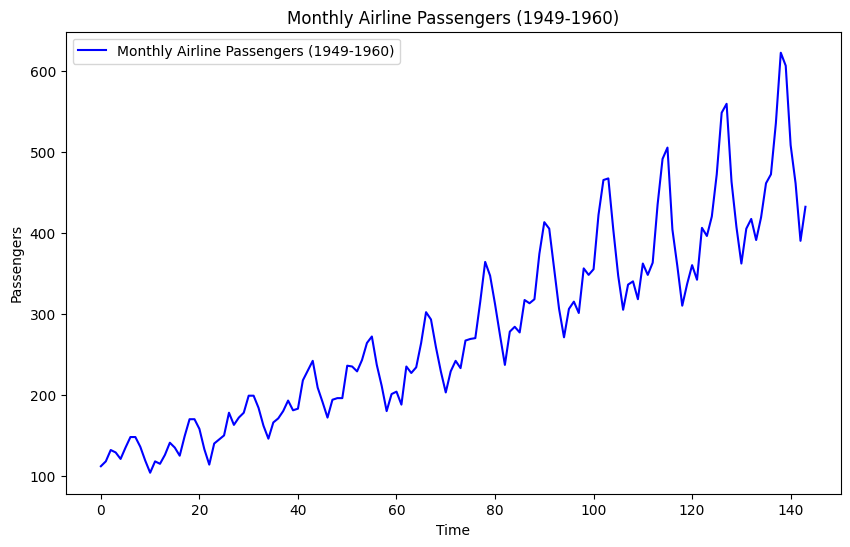

In [11]:
# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers").data
AP = data["value"].values

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(AP, color="blue", label="Monthly Airline Passengers (1949-1960)")
plt.title("Monthly Airline Passengers (1949-1960)")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [14]:
# Prepare the data for autoregressive modeling
p = 3  # Number of lags (autoregressive order)
X = np.array([AP[i:i + p] for i in range(len(AP) - p)])
y = np.array([AP[i + p] for i in range(len(AP) - p)])

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape y_train and y_test to 2D arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Normalize y_train and y_test
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [15]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=10, activation="relu", input_shape=(p,)))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.3692 - mae: 0.4768 - val_loss: 1.6490 - val_mae: 1.1274
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2752 - mae: 0.4197 - val_loss: 1.5594 - val_mae: 1.0893
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2937 - mae: 0.4270 - val_loss: 1.4642 - val_mae: 1.0474
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2471 - mae: 0.3837 - val_loss: 1.3713 - val_mae: 1.0082
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2510 - mae: 0.3761 - val_loss: 1.2806 - val_mae: 0.9679
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1998 - mae: 0.3476 - val_loss: 1.2048 - val_mae: 0.9327
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2358 - mae: 0.3566 - val_loss: 1.1257 - val_mae: 0.8939
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2112 - mae: 0.3419 - val_loss: 1.0568 - val_mae: 0.8602
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2113 - mae: 0.3399 - val_loss: 0

In [16]:
# Evaluate the model on the test set
test_performance = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_performance[0]}")
print(f"Test MAE: {test_performance[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5429 - mae: 0.6081
Test Loss (MSE): 0.5428709387779236
Test MAE: 0.6080605983734131


In [18]:
# Make predictions
predictions = model.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.993878  ],
       [2.2145493 ],
       [1.6699178 ],
       [1.5346292 ],
       [0.9473093 ],
       [0.9802462 ],
       [1.0621809 ],
       [0.99499214],
       [1.381412  ],
       [1.3459665 ],
       [1.6246132 ],
       [1.9369168 ],
       [2.4651546 ],
       [2.6254287 ],
       [2.1517634 ],
       [1.9305687 ],
       [1.4046965 ],
       [1.5057598 ],
       [1.5196604 ],
       [1.4331622 ],
       [1.6412272 ],
       [1.856648  ],
       [1.9754853 ],
       [2.4601328 ],
       [3.0327477 ],
       [3.0388255 ],
       [2.5770524 ],
       [2.3646824 ],
       [1.6491305 ]], dtype=float32)

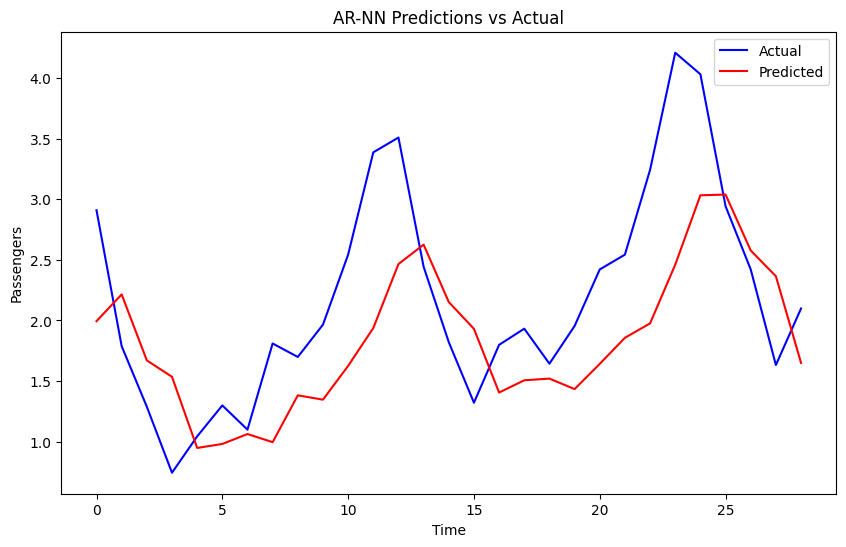

In [19]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, color="blue", label="Actual")
plt.plot(predictions, color="red", label="Predicted")
plt.title("AR-NN Predictions vs Actual")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [22]:
y_test

array([[2.90948258],
       [1.78727626],
       [1.28728334],
       [0.74284662],
       [1.04284236],
       [1.2983943 ],
       [1.09839713],
       [1.80949816],
       [1.69838863],
       [1.96505152],
       [2.54282111],
       [3.38725358],
       [3.50947407],
       [2.44282252],
       [1.82060912],
       [1.3206162 ],
       [1.79838721],
       [1.93171865],
       [1.64283386],
       [1.95394056],
       [2.42060062],
       [2.54282111],
       [3.24281118],
       [4.20946415],
       [4.03168889],
       [2.94281544],
       [2.42060062],
       [1.63172291],
       [2.09838296]])

In [20]:
predictions

array([[1.993878  ],
       [2.2145493 ],
       [1.6699178 ],
       [1.5346292 ],
       [0.9473093 ],
       [0.9802462 ],
       [1.0621809 ],
       [0.99499214],
       [1.381412  ],
       [1.3459665 ],
       [1.6246132 ],
       [1.9369168 ],
       [2.4651546 ],
       [2.6254287 ],
       [2.1517634 ],
       [1.9305687 ],
       [1.4046965 ],
       [1.5057598 ],
       [1.5196604 ],
       [1.4331622 ],
       [1.6412272 ],
       [1.856648  ],
       [1.9754853 ],
       [2.4601328 ],
       [3.0327477 ],
       [3.0388255 ],
       [2.5770524 ],
       [2.3646824 ],
       [1.6491305 ]], dtype=float32)